In [1]:
import numpy as np
import random

In [2]:
def genData(numPoints, A, K, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    for i in range(0, numPoints):
        x[i][0] = 1
        x[i][1] = i
        y[i] = (A * i + K) + random.uniform(0,1) * variance
    return x,y

In [3]:
x, y = genData(numPoints=100, A=2, K=100, variance=30)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

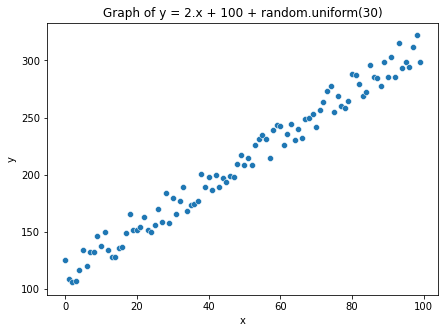

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5))
fig = sns.scatterplot(x = x[:,1], y=y)
fig.set(xlabel = "x", ylabel = "y", title='Graph of y = 2.x + 100 + random.uniform(30)')
plt.plot


In [5]:
m, n = np.shape(x)
print("m(Length)= ", m, "and n (width)=", n)

m(Length)=  100 and n (width)= 2


In [6]:
x[0:5]

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.]])

In [8]:
alpha = 0.0005
theta = np.ones(n)

theta

array([1., 1.])

In [9]:
x.T

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77

In [10]:
best_guess = np.dot(x, theta)
best_guess

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

[Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y'),
 Text(0.5, 1.0, 'Graph of y = 2.x + 100 + random.uniform(30)')]

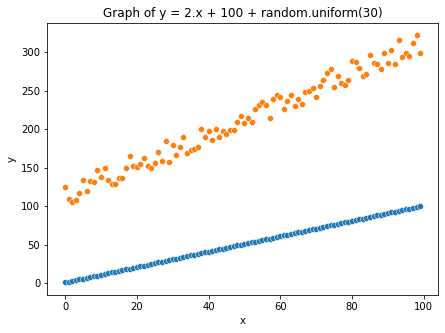

In [11]:
fig = plt.figure(figsize=(7,5))
fig = sns.scatterplot(x=x[:,1], y=best_guess)
fig = sns.scatterplot(x=x[:,1], y=y)
fig.set(xlabel="x", ylabel="y", title='Graph of y = 2.x + 100 + random.uniform(30)')

In [12]:
loss = best_guess - y
loss

array([-124.39401333, -106.89961201, -102.88468012, -103.48878364,
       -111.82430845, -128.40097281, -113.08092009, -124.90112395,
       -123.0905753 , -136.49816556, -126.97425037, -138.25244838,
       -121.14901799, -114.27353048, -113.40534134, -120.38555049,
       -120.16953804, -131.51402698, -146.54676867, -131.88728185,
       -130.50292496, -132.76589282, -139.71643503, -127.65111071,
       -124.64398921, -129.69590803, -143.1582427 , -130.72306716,
       -155.37128595, -128.04115073, -148.93157204, -134.00675794,
       -144.45886214, -155.55848141, -133.71472528, -137.1925838 ,
       -137.79109956, -139.04170728, -161.68303479, -149.29182024,
       -156.65160723, -144.48106142, -156.9620648 , -145.44503418,
       -152.0998732 , -147.38337754, -151.67399244, -150.42835228,
       -160.37980997, -167.39552431, -157.56524389, -162.65551577,
       -155.98895698, -171.75527115, -176.17238725, -179.0236761 ,
       -174.39989944, -157.07999989, -180.37109624, -183.83613

In [13]:
cost = np.sum(loss ** 2) / (2 * m)
cost

13432.542474051112

In [14]:
gradient = np.ones(n)
gradient[0] = 0
gradient[1] = 0
for i in range(len(x)):
    gradient[0] += -(1 / m) *(y[i] - ((theta[0] * x[i,1]) + theta[1]))
    gradient[1] += -(1 / m) * x[i,1] * (y[i] - ((theta[0] * x[i,1])+ theta[1]))
gradient

array([ -161.05075351, -8811.71514288])

In [15]:
gradient = np.dot(x.T, loss) / m
gradient

array([ -161.05075351, -8811.71514288])

In [16]:
theta = theta - alpha * gradient
theta

array([1.08052538, 5.40585757])

In [17]:
best_guess = np.dot(x, theta)

[Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y'),
 Text(0.5, 1.0, 'Graph of y = 2.x + 100 + random.uniform(30)')]

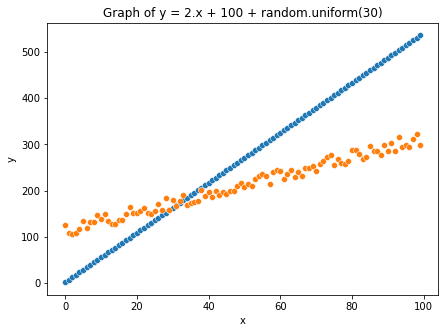

In [19]:
fig2 = plt.figure(figsize=(7, 5))
fig2 = sns.scatterplot(x=x[:,1], y=best_guess)
fig2 = sns.scatterplot(x=x[:,1], y=y)
fig2.set(xlabel="x", ylabel="y", title='Graph of y = 2.x + 100 + random.uniform(30)')

cost =  164.68197875132438


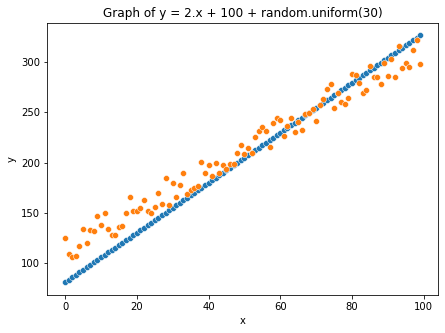

In [20]:
numIterations = 10000
for i in range(0, numIterations):
    best_guess = np.dot(x, theta)
    loss = best_guess - y
    cost = np.sum(loss ** 2) / (2 * m)
    gradient = np.dot(x.T, loss) / m
    theta = theta - alpha * gradient

fig2 = plt.figure(figsize=(7,5))
fig2 = sns.scatterplot(x=x[:,1], y=best_guess)
fig2 = sns.scatterplot(x=x[:,1], y=y)
fig2.set(xlabel = "x", ylabel = "y", title = 'Graph of y = 2.x + 100 + random.uniform(30)')
print("cost = ", cost)

In [21]:
theta

array([80.92082988,  2.47883465])

In [22]:
def gradientDescent(x, y, theta, alpha, numIterations):
    x_length, x_width = np.shape(x)
    
    if(x_length != y.size):
        raise Exception("Error in gradientDescent : Length of x and y data inputs are different ")
    else:
        m = x_length
        
    if(x_width < 2):
        raise Exception("Error in gradientDescent : x input data must contain at least two columns with x=[0,n]")
        
    for i in range(0, numIterations):
        best_guess = np.dot(x, theta)
        loss = best_guess - y
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(x.T, loss) / m
        theta = theta - alpha * gradient
    return theta

In [23]:
x, y = genData(numPoints = 100, A = 2, K = 100, variance= 30)
theta = np.ones(n)

In [24]:
theta = gradientDescent(x, y, theta, alpha = 0.0005, numIterations= 10000)
theta

array([85.10577111,  2.44466895])

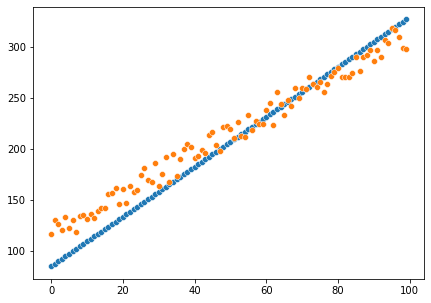

In [26]:
best_guess = np.dot(x, theta)
fig = plt.figure(figsize=(7,5))
fig = sns.scatterplot(x=x[:,1], y=best_guess)
fig = sns.scatterplot(x=x[:,1], y=y)

In [31]:
def genDataM(numPoints, numDimensions, x_upper, thetas, variance):
    x = np.random.rand(numPoints, numDimensions)
    y = np.zeros(shape = numPoints)
    for i in range(0, numPoints):
        x[i][0] = 1
        y[i] = 0
        for j in range(0, len(thetas)):
            y[i] += x[i,j] * thetas[j]
        y[i] += random.uniform(0,1) * variance
    return x,y

In [32]:
#step 1
x, y = genDataM(numPoints=500, numDimensions=3,x_upper=100, thetas=[1,5,3], variance=5)
theta = np.ones(3)
x[0:5]

array([[1.        , 0.79238251, 0.67713377],
       [1.        , 0.720214  , 0.36700809],
       [1.        , 0.71658075, 0.31798174],
       [1.        , 0.00163477, 0.15502943],
       [1.        , 0.83611279, 0.77042475]])

In [33]:
#step 2
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,1],x[:,2],y)

Using matplotlib backend: MacOSX


In [46]:
#step 3
theta = gradientDescent(x, y, theta, alpha=0.0005, numIterations = 50000)
theta

array([3.70538903, 4.98227472, 2.67237812])

In [47]:
#step 4
best_guess = np.dot(x, theta)
ax.scatter(x[:,1],x[:,2],best_guess)

2021-08-16 14:19:59.391 python[4256:198413] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:737
2021-08-16 14:19:59.519 python[4256:198413] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:737
2021-08-16 14:19:59.731 python[4256:198413] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:737
2021-08-16 14:20:01.281 python[4256:198413] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:737
2021-08-16 14:20:03.611 python[4256:198413] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:737
2021-08-16 14:20:07.565 python[4256:198413] *** Asserti